In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

%matplotlib inline

In [2]:
from NPTFit import incgamma_fct as igf
from NPTFit import interp1d as interp

In [3]:
n2 = 20
sb = 10.
f2 = 15.
k_max = 100

In [152]:
np.linspace(1e-1, 1e1, 10)

array([  0.1,   1.2,   2.3,   3.4,   4.5,   5.6,   6.7,   7.8,   8.9,  10. ])

In [118]:
fmin = 1.5
fmid = 15.
fmax = 150.
gammamin = igf.incgamma_up_fct_ary(k_max, 1. - n2,  float(fmin))[2]
gammamid = igf.incgamma_up_fct_ary(k_max, 1. - n2,  float(fmid))[2]
gammamax = igf.incgamma_up_fct_ary(k_max, 1. - n2,  float(fmax))[2]

In [119]:
a12 = 1/(fmid - fmin)
a21 = 1/(fmid - fmin)
a23 = 1/(fmax - fmid)
a32 = 1/(fmax - fmid)

a11 = a12 + a21
a22 = a12 + a21 + a23 + a32
a33 = a23 + a32

b1 = 3*(gammamid - gammamin)/(fmid - fmin)**2
b3 = 3*(gammamax - gammamid)/(fmax - fmid)**2
b2 = b1 + b3

In [125]:
amat = np.array(((a11, a12, 0), (a21, a22, a23), (0, a32, a33)))
bvec = np.array((b1, b2, b3))

In [128]:
sol = np.linalg.solve(amat,bvec)

k0 = sol[0]
k1 = sol[1]
k2 = sol[2]

In [129]:
a1 = k0*(fmid - fmin) - (gammamid - gammamin)
b1 = -k1*(fmid - fmin) + (gammamid - gammamin)
a2 = k1*(fmax - fmid) - (gammamax - gammamid)
b2 = -k2*(fmax - fmid) + (gammamax - gammamid)

In [130]:
def q1(f):
    t = (f-fmin)/(fmid-fmin)
    return (1-t)*gammamin + t*gammamid + t*(1-t)*(a1*(1-t)+b1*t)

In [131]:
def q2(f):
    t = (f-fmid)/(fmax-fmid)
    return (1-t)*gammamid + t*gammamax + t*(1-t)*(a2*(1-t)+b2*t)

In [143]:
flow = np.linspace(fmin, fmid, 100)
fhigh = np.linspace(fmid, fmax, 100)
fref = np.linspace(fmin, fmax, 1000)

In [144]:
ginterplow = [q1(f) for f in flow]
ginterphigh = [q2(f) for f in fhigh]
gref = [igf.incgamma_up_fct_ary(k_max, 1. - n2,  float(f))[2] for f in fref]

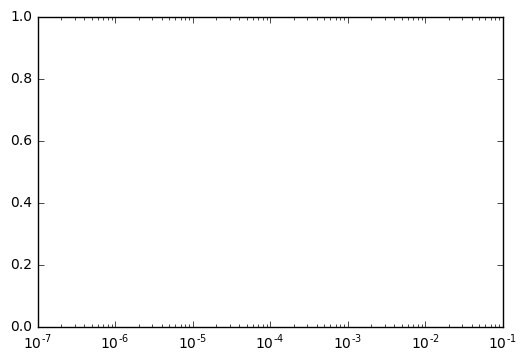

In [147]:
plt.plot(flow, ginterplow)
plt.plot(fhigh, ginterphigh)
plt.plot(fref, gref)
plt.xscale('log')

In [105]:
fbins = np.linspace(f2*10**-1.5,f2*10**1.5,1000)
fbins_coarse = np.linspace(f2*10**-1.5,f2*10**1.5,50)
fbins_samp = np.linspace(f2*10**-1.5,f2*10**1.5,99)

In [106]:
ref_igf2 = np.array([igf.incgamma_up_fct_ary(k_max, 1. - n2,  float(f))[2] for f in fbins_coarse])
ref_igf3 = np.array([igf.incgamma_up_fct_ary(k_max, 1. - n2,  float(f))[3] for f in fbins_coarse])
ref_igf4 = np.array([igf.incgamma_up_fct_ary(k_max, 1. - n2,  float(f))[4] for f in fbins_coarse])
ref_igf5 = np.array([igf.incgamma_up_fct_ary(k_max, 1. - n2,  float(f))[5] for f in fbins_coarse])

In [107]:
logint_igf2 = interp.loginterp1d(fbins_coarse, ref_igf2, fbins_samp)
logint_igf3 = interp.loginterp1d(fbins_coarse, ref_igf3, fbins_samp)
logint_igf4 = interp.loginterp1d(fbins_coarse, ref_igf4, fbins_samp)
logint_igf5 = interp.loginterp1d(fbins_coarse, ref_igf5, fbins_samp)

In [108]:
loglogint_igf2 = interp.logloginterp1d(fbins_coarse, ref_igf2, fbins_samp)
loglogint_igf3 = interp.logloginterp1d(fbins_coarse, ref_igf3, fbins_samp)
loglogint_igf4 = interp.logloginterp1d(fbins_coarse, ref_igf4, fbins_samp)
loglogint_igf5 = interp.logloginterp1d(fbins_coarse, ref_igf5, fbins_samp)

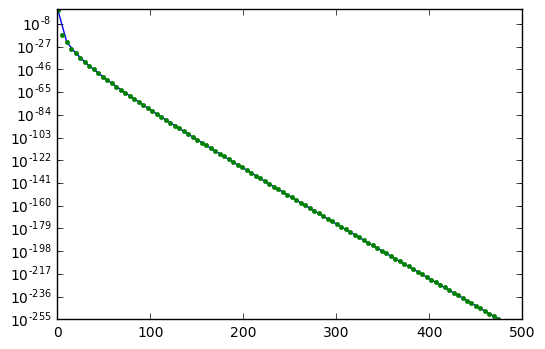

In [115]:
plt.plot(fbins_coarse, ref_igf2)
# plt.plot(fbins_samp, logint_igf2, '.')
plt.plot(fbins_samp, loglogint_igf2, '.')

# plt.xscale('log')
plt.yscale('log')

In [110]:
gammaref = np.array([igf.incgamma_up_fct_ary(k_max, 1. - n2,  float(f))[2] for f in fbins_samp])
loglogerr = np.abs((loglogint_igf2 - gammaref)/gammaref)

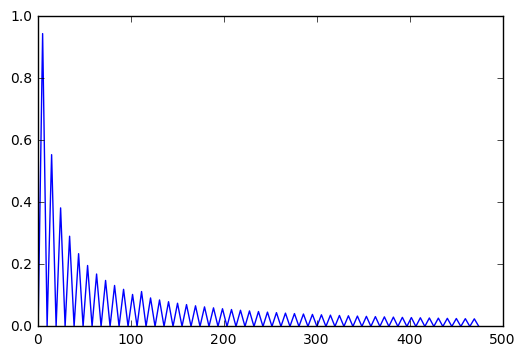

In [111]:
plt.plot(fbins_samp, loglogerr)
# plt.xscale('log')
# plt.yscale('log')

In [9]:
refvals = np.array([igf.incgamma_up_fct_ary(k_max, 1. - n2,  float(f))[2] for f in fbins_samp])
difvals = loglogint_igf2 - refvals

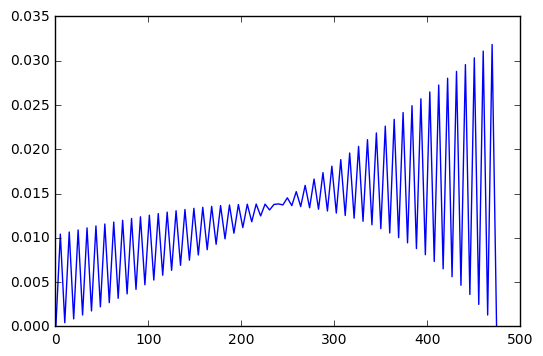

In [90]:
plt.plot(fbins_samp, np.abs(difvals/refvals))
# plt.xscale('log')
# plt.yscale('log')

In [92]:
nrefpts = 50

# frefvals = np.logspace(-1.5 + np.log10(f2), 1.5 + np.log10(f2), nrefpts)
# fintvals = np.logspace(-1.5 + np.log10(f2), 1.5 + np.log10(f2), 100)

frefvals = np.linspace(f2*10**-1.5, f2*10**1.5, nrefpts)
fintvals = np.linspace(f2*10**-1.5, f2*10**1.5, 100)
# logfrefvals = np.linspace(np.log10(f2)+10**-1.5, np.log10(f2)+10**1.5)

y = np.array([igf.incgamma_up_fct_ary(k_max, 1. - n2,  float(f))[2] for f in frefvals])

testsplinefunc = interpolate.CubicSpline(np.log10(frefvals), np.log10(y))

In [93]:
gammarefvals = np.array([igf.incgamma_up_fct_ary(k_max, 1. - n2,  float(f))[2] for f in fintvals])

In [94]:
yinterp = testsplinefunc(np.log10(fintvals))

In [95]:
loginterperr = (yinterp - np.log10(gammarefvals))/np.log10(gammarefvals)

/Users/laurachang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app
/Users/laurachang/anaconda/lib/python3.5/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


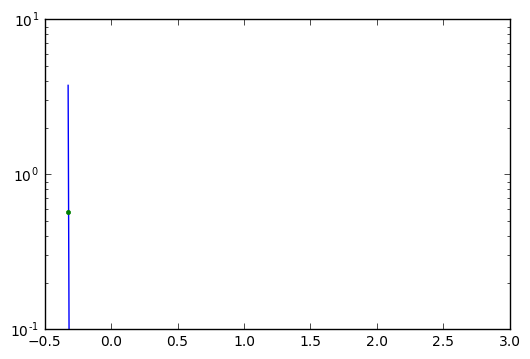

In [99]:
plt.plot(np.log10(frefvals), np.log10(y))
plt.plot(np.log10(fintvals), np.log10(yinterp), '.')
# plt.xscale('log')
plt.yscale('log')

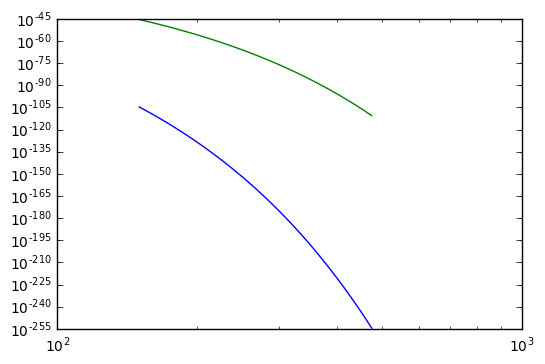

In [47]:
plt.plot(frefvals, y)
plt.plot(fintvals, np.exp(yinterp))
plt.plot(fintvals, np.exp(loginterperr))
plt.xscale('log')
plt.yscale('log')

In [150]:
splineinterp = np.exp(testsplinefunc(np.log10(fintvals)))

In [152]:
? y

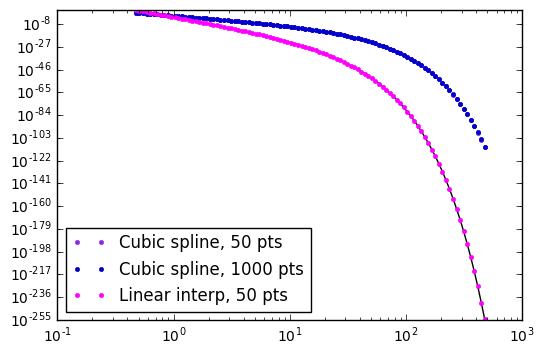

In [151]:
plt.plot(fbins, gammarefvals, color = 'black')
plt.plot(fintvals, splineinterp, '.', label = 'Cubic spline, 50 pts', color = 'blueviolet')
plt.plot(fintvals, splineinterp2, '.', label = 'Cubic spline, 1000 pts', color = 'mediumblue')

plt.plot(fbins_samp, loglogint_igf2, '.', label = 'Linear interp, 50 pts', color = 'magenta')

plt.xscale('log')
plt.yscale('log')

plt.legend(loc = 3)
